<a href="https://colab.research.google.com/github/imgaurav0001/Loan_Eligibility_Prediction/blob/main/Loan_Eligibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Eligibility Prediction

Let's predict whether a loan ID is eligible or not based on factors such as ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, and more. My goal is to submit a report to my client, who is a bank manager. This report should help them efficiently decide whether to approve an application or not in a short amount of time. Let's get started.

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading dataset

df = pd.read_csv("Loan_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Getting information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are a total of 614 rows and 13 columns. Moreover, there are also many null values in the dataset.

In [ ]:
# Description of the data

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


As we can see, there is a significant difference between the 75th percentile and the maximum values in the first four columns. This suggests that the data is skewed on one side.

In [ ]:
# Computing two variables

pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


As we can see here, the applicant with a credit history score of 1 is more eligible than one with a score of 0.

<Axes: >

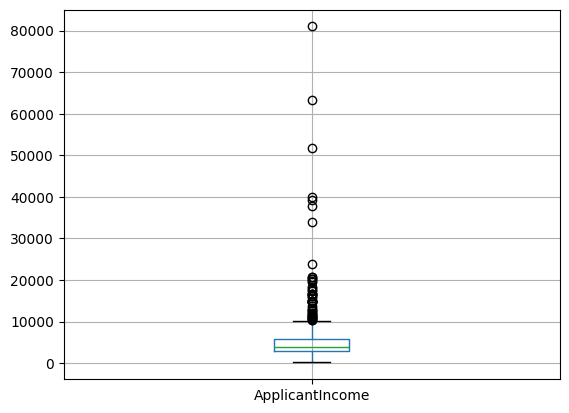

In [ ]:
# Visualisation

df.boxplot(column="ApplicantIncome")

By looking at the box plot, we can see a lot of outliers in the data, which need to be fixed for further analysis.

<Axes: >

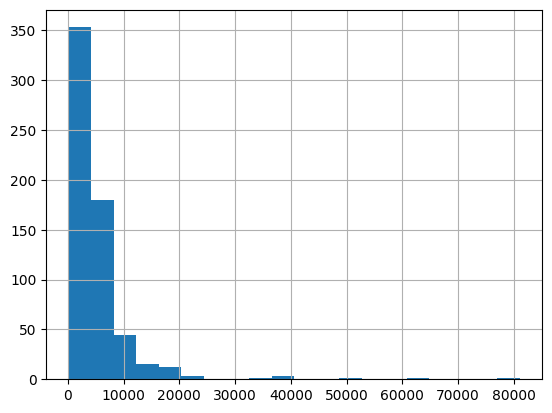

In [ ]:
# Visualisation

df['ApplicantIncome'].hist(bins=20)

We can see that, the graph is one-sided, which means we need to normalize the data.

<Axes: >

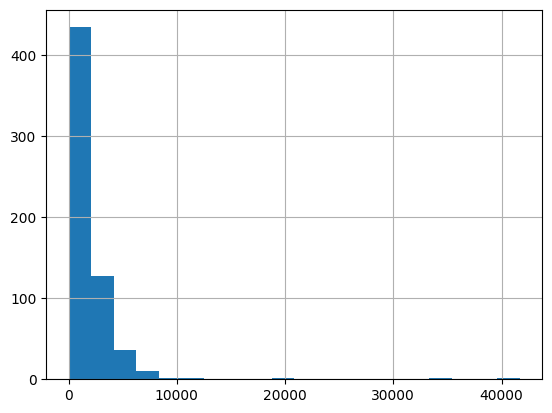

In [ ]:
# Visualisation

df['CoapplicantIncome'].hist(bins=20)

'CoapplicantIncome' column is also skewed. So, we need to normalize that too.

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

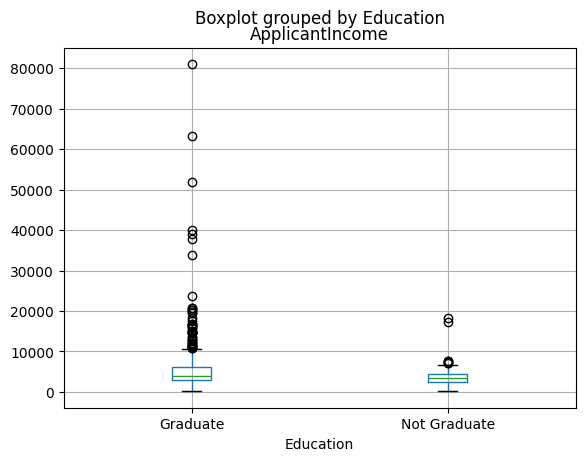

In [ ]:
# Visualisation

df.boxplot(column='ApplicantIncome', by="Education")

Well, the mean salary does not differ significantly between graduates and non-graduates. However, some graduates earn much higher salaries than non-graduates.

<Axes: >

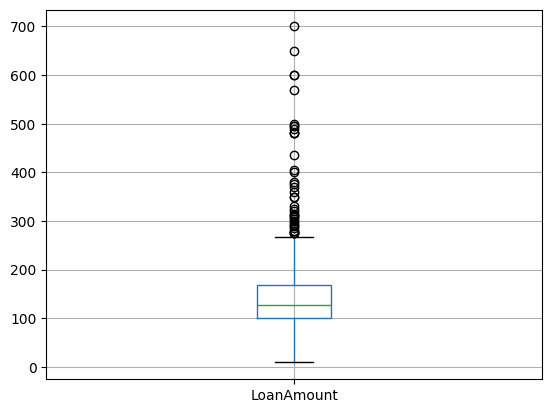

In [ ]:
# Visualisation

df.boxplot(column='LoanAmount')

Similar situation where we have lot of outliers in a variable.

<Axes: >

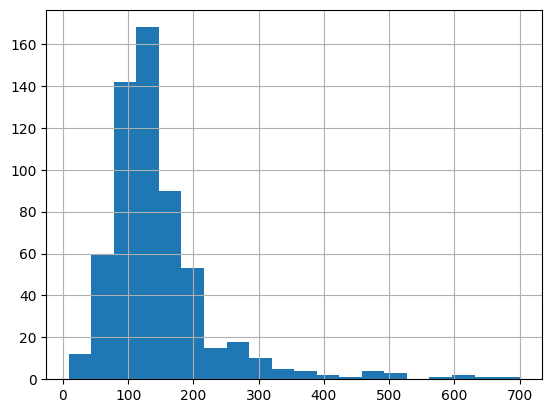

In [ ]:
# Visualisation

df['LoanAmount'].hist(bins=20)

Even loan amount is also little bit right skewed.

# Normalization
So, let's normalize every variables.

<Axes: >

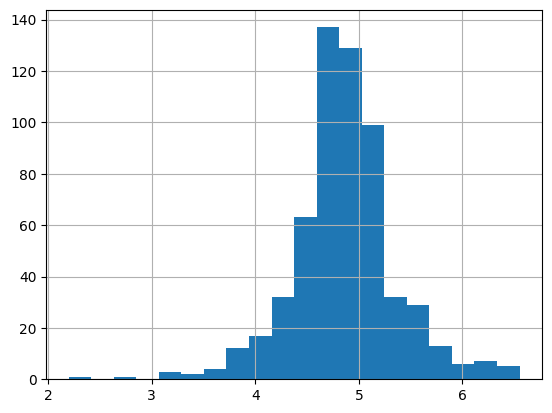

In [ ]:
# Normalizing 'LoanAmount_log'

df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

As we can see, after using **.log** the variable is lot normalized now.

# Data Cleaning
Moving ahead, let's see how many null values are there in the dataset

In [ ]:
# Null values in every variables

df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Yes, there are a lot of null values in the dataset, we need to clean them.

In [ ]:
# Filling NAs with modes and means

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

<ipython-input-56-a3887bde1783>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-56-a3887bde1783>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

I am using the mode function for categorical values to replace the null values and for numerical values I use the mean() function.

In [ ]:
# Checking null values

df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


As we can see, now there are 0 missing values.

In [ ]:
# Performing data adaption and Normalization

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

<Axes: >

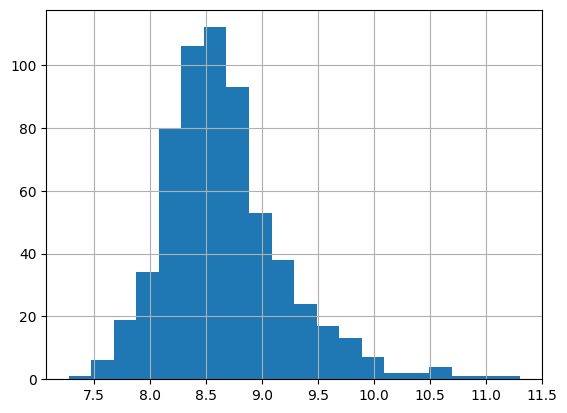

In [ ]:
# Visualation

df['TotalIncome_log'].hist(bins=20)

Now, our data is completely normalzed in the dataset.

# Supervised Machine Learning

Let's implement supervised machine learning in our dataset.

In [ ]:
# Declaring Features and Target Variables

X = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values # Features
y = df.iloc[:, 12].values # Target Variables

In this code, I am storing all the Independent variables in X and the Dependent variables in y. 'iloc' selects the data frame using intereger-location based on indexing. Here, I am using NumPy's 'r_' array concatenation to combine multiple column index ranges.

In [ ]:
# Printitng X

X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [ ]:
# Printing y

y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [ ]:
# Training and Testing Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In the above cell, we are importing train_test_split from sklearn for modeling. After that, we create four variables and store values in train_test_split with test_size 20% and random_state 0 because we do not want to change the result in every second. It will give the same accuracy and the same result every time we run the code.

In [ ]:
# Printing X_train

X_train

array([['Male', 'Yes', '0', ..., 1.0, 4.875197323201151, 5858.0],
       ['Male', 'No', '1', ..., 1.0, 5.278114659230517, 11250.0],
       ['Male', 'Yes', '0', ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       ['Male', 'Yes', '3+', ..., 1.0, 5.298317366548036, 8334.0],
       ['Male', 'Yes', '0', ..., 1.0, 5.075173815233827, 6033.0],
       ['Female', 'Yes', '0', ..., 1.0, 5.204006687076795, 6486.0]],
      dtype=object)

As we can see, there are some categorical values too. So, we need to convert into 0 and 1.

In [ ]:
# Let's convert all the categorical values to numeric using LebalEncoder for X_train and X_test

from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

In [ ]:
# Converting in for loop

for i in range(0, 5):
     X_train[:, i] = labelencoder_X.fit_transform(X_train[:, i])

In [ ]:
# Also, 7th index

X_train[:, 7] = labelencoder_X.fit_transform(X_train[:, 7])

In [ ]:
# Printing X_train

X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [ ]:
# Converting all the categorical values to numeric using LebalEncoder for y_train

labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [ ]:
# Printing y_train

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
# Converting in for loop

for i in range(0, 5):
     X_test[:, i] = labelencoder_X.fit_transform(X_test[:, i])

In [ ]:
# Also, 7th index

X_test[:, 7] = labelencoder_X.fit_transform(X_test[:, 7])

In [ ]:
# Converting all the categorical values to numeric using LebalEncoder for y_test

labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [ ]:
# Printing X_test

X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [ ]:
# Printing y_test

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

As we have different types of data in dataframe, I scaled them for better prediction.

### Method 1: Decision Tree Classifier

In [ ]:
# Performing Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DTClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Predicting output

y_pred = DTClassifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
# Converting matrix to accuracy

from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.7073170731707317


As we can see, the output is around 70%, which is not much good in predicting output.

### Method 2: Naive Bayes

In [ ]:
# Performing Naive Bayes

from sklearn.naive_bayes import GaussianNB

NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting output

y_pred = NBClassifier.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
# Printing output in Accuracy

print("Accuracy", metrics.accuracy_score(y_pred,y_test))

Accuracy 0.8292682926829268


As we can see Naive Bayes's accuracy is **better** than Decision Tree. So, we will use **Naive Bayes** method to predict the outcome.

## Predicting without Loan_Status.

In [ ]:
# Importing data

test_data = pd.read_csv('test_data.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


This is the same data set but without the last column which is **Loan_Status**. The main goal is to predict whether a loan should be approved or not.

In [ ]:
# Counting null values

test_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Filling NAs with modes

test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)

<ipython-input-86-cd74bfdf6d9d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
<ipython-input-86-cd74bfdf6d9d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
# Filling NA with mean

test_data.LoanAmount = test_data.LoanAmount.fillna(test_data.LoanAmount.mean())

In [ ]:
# Checking NAs values

test_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: >

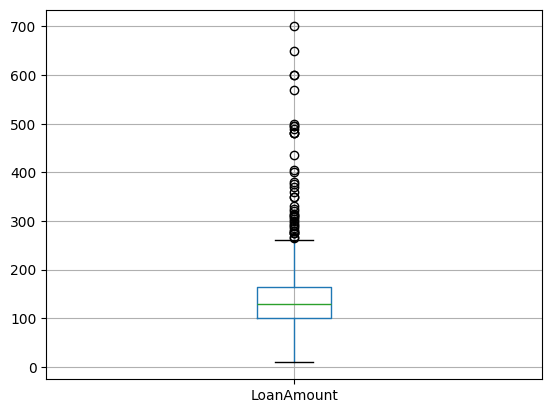

In [ ]:
# Visualtions

test_data.boxplot(column = "LoanAmount")

<Axes: >

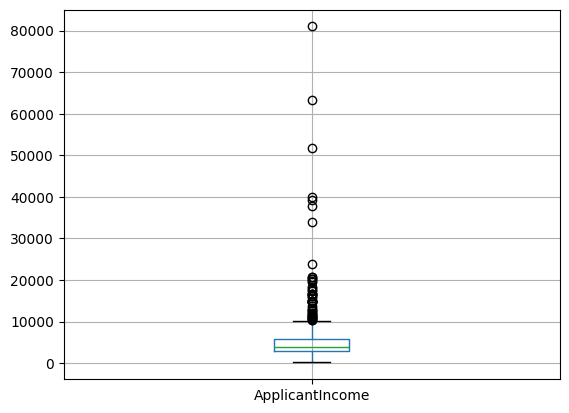

In [ ]:
# Visualtions

test_data.boxplot(column = "ApplicantIncome")

In [ ]:
# Normalizing 'LoanAmount_log'

test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

In [ ]:
# Performing data adaption

test_data['TotalIncome'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
test_data['Totalncome_log'] = np.log(test_data['TotalIncome'])

In [ ]:
# Defining all the features

test = test_data.iloc[:, np.r_[1:5, 9:11, 13:15]].values

In [ ]:
# Convert it with for loop

for i in range(0, 5):
     test[:, i] = labelencoder_X.fit_transform(test[:, i])

In [ ]:
# Transforming 7th index too.

test[:,7]=labelencoder_X.fit_transform(test[:, 7])

In [ ]:
# Scaling test dataframe

test = ss.fit_transform(test)

In [ ]:
# Predicting using Naive Bayes

pred = NBClassifier.predict(test)

In [ ]:
# Printing pred

pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

Here is the correct output. 1 means the that loan_id is eligible for loan and 0 is not.

In [ ]:
# Prinitng Loan Id and their prediction

result_df = pd.DataFrame({'Loan_ID': df['Loan_ID'], 'Prediction': pred})
print(result_df)

      Loan_ID  Prediction
0    LP001002           1
1    LP001003           1
2    LP001005           1
3    LP001006           1
4    LP001008           1
..        ...         ...
609  LP002978           1
610  LP002979           1
611  LP002983           1
612  LP002984           1
613  LP002990           0

[614 rows x 2 columns]


Here, we can clearly see which loan IDs are eligible for loan approval and which are not.

In [ ]:
filename = 'Predicted Data'
result_df.to_csv(filename, index=False)
print(f'Data exported to {filename} successfully.')

Data exported to Predicted Data successfully.


# Report

After analyzing the data, I can confidently state that achieving an accuracy of almost 83% is commendable for predicting whether an account holder's application should be approved or not. However, there is room for improvement, and we can enhance accuracy further through manipulations or alternative methods such as regression or random forest. Despite the current accuracy being satisfactory, it is advisable to consider additional factors for a more comprehensive evaluation.

I recommend the bank manager to utilize the 'Predicted Data' CSV file for verification. In this file, a value of 0 indicates that the candidate is not suitable for approval, whereas a value of 1 suggests they are eligible. While the current accuracy is at 83%, it's prudent for the bank manager to exercise caution and conduct a thorough check of the applicant's history and background before finalizing any approval decisions.